## <i> <center> DEWANK MAHAJAN (TASK - 3) </i> </center>
### <center>Unsupervised Machine Learning performing Clustering</center>

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets
import seaborn as sns

## <center> Importing Dataset </center>


In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


The head() & tail() give description about the type of data of flowers that are available for categorization.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# To print all null values present in our data set
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
# To check the Correlation; Heatmap and manual methods can be used
b = data.corr()
b

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


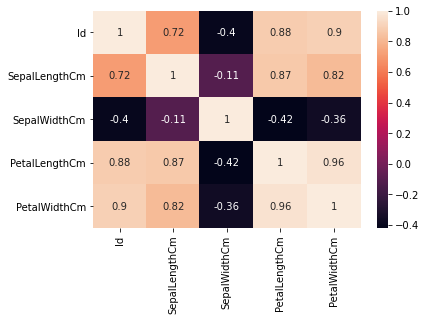

In [8]:
# Heatmap Presentation
sns.heatmap(b, annot = True)
# Lot of Corr is found between sepal and petal

## Identify Unique Species of Iris & Print the Sum count of each1.

In [9]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
print("SumCount for Iris Species")
data["Species"].value_counts()

# prof_way  >> print('\n' "SumCount for Iris Species" '\n',data["Species"].value_counts() )

SumCount for Iris Species


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## <center>  Pairplot with Regression lines & Kernel Density Estimate </center>

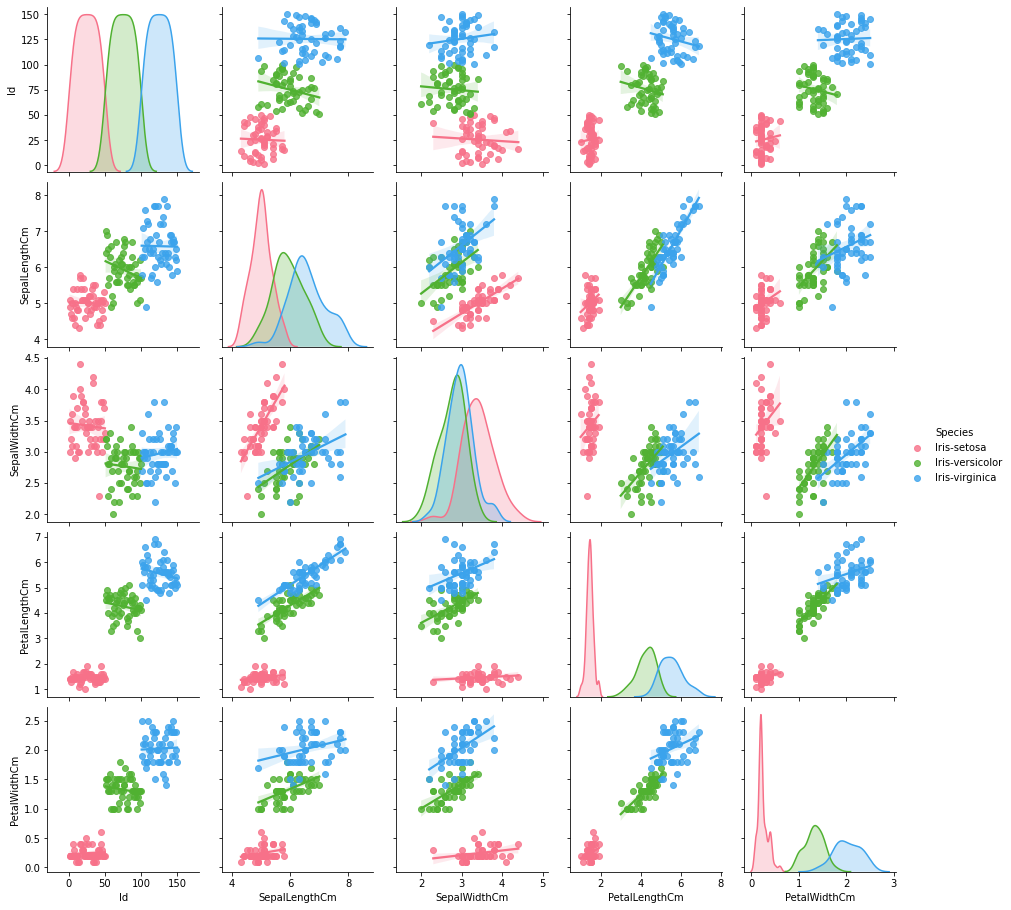

In [11]:
sns.pairplot(data, hue="Species", palette="husl", diag_kind="kde", kind = 'reg')

##  <center>Elbow plot to determine the Optimum number of clusters</center>
The best value of Cluster is defined by Inertia and Score Values.The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function such as inertia produced by different values of K and n_clusters.If K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. A centroid is a data point at the centre of a cluster. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

In [12]:
from sklearn.cluster import KMeans

x = data.drop(["Id", "Species"], axis = 1)

# Creating an array to store the inertia values
inertias =[]
# Creating an array to store the model's scores
scores=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    scores.append(kmeans.fit(x).score(x))
    inertias.append(kmeans.inertia_)
    
print(inertias[0:10])
print(scores[0:10])


[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]
[-680.8243999999995, -152.36870647733912, -78.94084142614601, -57.34540931571816, -46.53558205128205, -38.93873974358975, -34.19068792479664, -29.90537429982511, -27.92788215703498, -25.955497086247092]


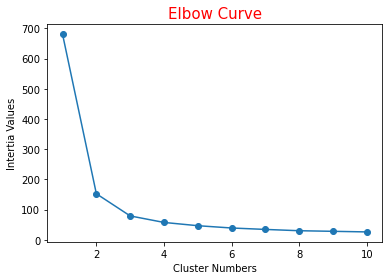

In [13]:
#ploting the elbow curve
plt.plot(range(1,11),inertias,"-o")
plt.xlabel("Cluster Numbers")
plt.ylabel("Intertia Values")
plt.title("Elbow Curve",color='red',fontsize=15)
plt.show()

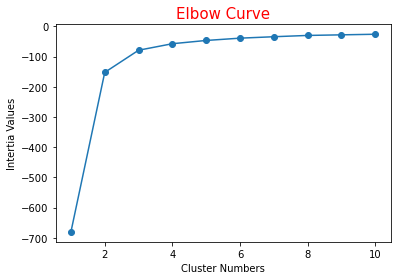

In [14]:
plt.plot(range(1,11),scores,"-o")
plt.xlabel("Cluster Numbers")
plt.ylabel("Intertia Values")
plt.title("Elbow Curve",color='red',fontsize=15)
plt.show()

#### The method uses Within Cluster Sum of Squares (WCSS).The point where WCSS stops droping considerebly is the optimum number of cluster.
#### In our case, that number is 3.

In [15]:
# Trainning the module with the cluster size of 3
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [26]:
                                 # Storing Data Cluster LABEL to DataFrame
data['Cluster'] = kmeans.labels_

In [17]:
#data.head()
#data.tail()

In [27]:
#Creating an data frame to store the datas of three cluster values
data1 = data[data['Cluster']==0]
data2 = data[data['Cluster']==1]
data3 = data[data['Cluster']==2]

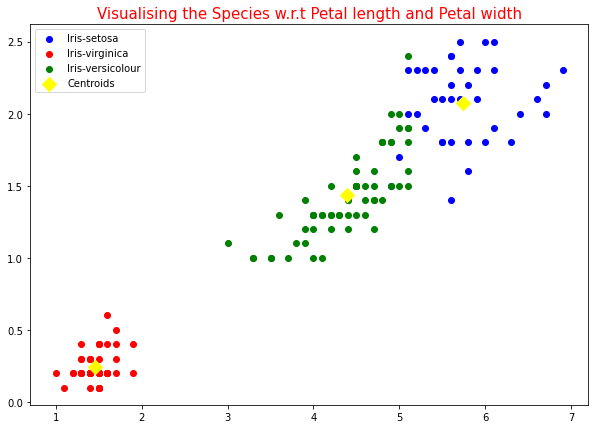

In [30]:
#Visualising the Species w.r.t Petal length and Petal width
plt.figure(figsize=(10,8))
plt.scatter(data1['PetalLengthCm'], data1['PetalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['PetalLengthCm'], data2['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['PetalLengthCm'], data3['PetalWidthCm'],color='green',label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:,3],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Petal length and Petal width',color='Red',fontsize=15)
plt.legend()
plt.show()

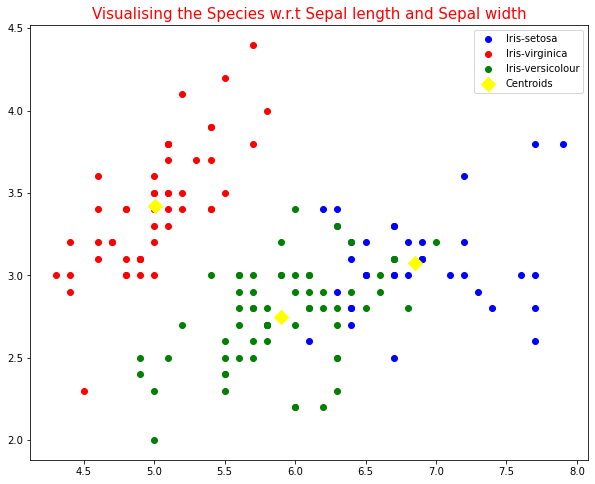

In [33]:
#Visualising the Species w.r.t Sepal length and Sepal width
plt.figure(figsize=(10,8))
plt.scatter(data1['SepalLengthCm'], data1['SepalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['SepalLengthCm'], data3['SepalWidthCm'],color='green',label ='Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Sepal length and Sepal width', color='red',fontsize=15)
plt.legend()
plt.show()

# Doubt here
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


Doubt here